In [65]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import os
import numpy as np
from cycler import cycler

In [28]:
## Setup headers and fonts

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})        # use LaTeX

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams.update({'font.size': 12})




Header = ["Sources", "Targets", "DirectSumComparison","NumSources","NumTargets","Theta","Order","TreeType","MaxParNode", "BatchSize", "Kappa",
          "PotentialType","sflag","pflag","p","time_preproc", "TreeBuildTime", "time2", "time3", "time4", "time5",
          "time6", "time7", "time8", "time9", "time10", "time11", "TreecodeTime", "time13",
          "dpengglob", "tpengglob", "abs_pengerr", "RelativeError", "inferr", "relinferr", "2-norm Error", "Rel. 2-Norm Error", "NumDevices"]


In [148]:
## Load Dataframe
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/KITCpaperData/hermiteTesting/coulomb/'

# ## Compare to Lagrange
# resultsFile='hermite_vs_lagrange_gpu_yesCheck_10000000.csv'


## Batch-Size Study
# resultsFile='hermite_batch_node_size_1000000.csv'
# resultsFile='hermite_coarse_batch_node_size_10000000.csv'
# resultsFile='hermite_batch_node_size_10000000.csv'
# resultsFile='K40_hermite_batch_node_size_1000000.csv'

## GPU Parallelization
# resultsFile='K20_hermite_GPU_parallelized_1000000.csv'
# resultsFile='K20_hermite_GPU_parallelized_10000000.csv'
# resultsFile='TitanV_hermite_GPU_parallelized_1000000.csv'
resultsFile='TitanV_hermite_GPU_parallelized_10000000.csv'

df = pd.read_csv(resultsDir + resultsFile, names=Header)


In [149]:
## Plotting functions


def logAversusLogBcolorbyC(df,A,B,C,save=False,hlines={}):
#     df = df.sort_values(by=B)
    fig, ax = plt.subplots(figsize=(8,6))
#     fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    lagrange = df.loc[df['PotentialType']==0]
    hermite = df.loc[df['PotentialType']==4]
    
    grouped = lagrange.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='Lagrange: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='Lagrange: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='Lagrange: %s = %i'%(C,name))
            
    grouped = hermite.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='Hermite: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='Hermite: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='Hermite: %s = %i'%(C,name))
        
    plt.xlabel(B)
    plt.ylabel(A)
    
    for hline in hlines:
#     plt.axhline(y=62.6, color='r', linestyle='-')
        plt.axhline(y=hline, color='r', linestyle='-')
#         plt.axhline(y=1698, color='r', linestyle='-') # for 10 million
#     plt.axhline(y=10**6, color='r', linestyle='--') # CPU DS for 10 million
    plt.grid()
#     plt.ylim([20,100])
    
    plt.legend(loc = 'best')
#     plt.legend(loc = 'best').set_visible(False)
#     plt.title('Lines of Constant Theta: Stars=Hermite, Circles=Lagrange')
    if save != False:
        saveID = save
        plt.savefig(saveID+'.png', bbox_inches='tight',format='png')
    plt.show()
    
def numDeviceComparison(df,A,B,C,save=False,hlines={}):
    fig, ax = plt.subplots(figsize=(8,6))
    single = df.loc[df['NumDevices']==1]
    double = df.loc[df['NumDevices']==2]
    
    default_cycler = (cycler(color=['r', 'g', 'b']) +
                  cycler(linestyle=['-', '-', '-']))

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)


    grouped = single.groupby(C)
#     n = len(group[B])
#     print(n)
#     color=cm.rainbow(np.linspace(0,1,n))
#     print(color)
#     colorIdx=0
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='1 GPU: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='1 GPU: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='1 GPU: %s = %i'%(C,name))
            
            
    default_cycler = (cycler(color=['r', 'g', 'b']) +
                  cycler(linestyle=['--', '--', '--']))

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    grouped = double.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='2 GPUs: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='2 GPUs: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='2 GPUs: %s = %i'%(C,name))
        
    plt.xlabel(B)
    plt.ylabel(A)
    
    for hline in hlines:
#     plt.axhline(y=62.6, color='r', linestyle='-')
        plt.axhline(y=hline, color='r', linestyle='-')
#         plt.axhline(y=1698, color='r', linestyle='-') # for 10 million
#     plt.axhline(y=10**6, color='r', linestyle='--') # CPU DS for 10 million
    plt.grid()
#     plt.ylim([20,100])
    
    plt.legend(loc = 'best')
#     plt.legend(loc = 'best').set_visible(False)
#     plt.title('Lines of Constant Theta: Stars=Hermite, Circles=Lagrange')
    if save != False:
        saveID = save
        plt.savefig(saveID+'.png', bbox_inches='tight',format='png')
        
        
    plt.figure()
    grouped1 = single.groupby(C)
    grouped2 = double.groupby(C)
    for name1,group1 in grouped1:
        for name2,group2 in grouped2:
            if name1==name2:
                times1 = group1['TreecodeTime'].values
                times2 = group2['TreecodeTime'].values
                ratio = times1/times2 / 2
                errors = group1['Rel. 2-Norm Error']
                
                plt.semilogx(errors,ratio, 'o-', label='Theta = %f'%(name1))
    
    plt.legend()
    plt.xlabel('Rel. 2-Norm Error')
    plt.ylabel('Parallel Efficiency')
    
    if save != False:
        saveID = save
        plt.savefig(saveID+'_ratios.png', bbox_inches='tight',format='png')
        
        
    plt.show()
    
def directSumTitanParallel(save=False):
    sizes = np.array([10**5, 10**6, 10**7])
    times1 = np.array([0.500521, 11.86172, 1252.688545])
    times2 = np.array([0.697324, 6.388148, 627.638747])
    efficiency = times1/times2/2
    
    plt.figure()
    plt.loglog(sizes,times1,'-ro',label='1 TitanV GPU')
    plt.loglog(sizes,times2,'-bo',label='2 TitanV GPUs')
    plt.legend()
    plt.xlabel('Number of Particles')
    plt.ylabel('Direct Sum Time (s)')
    plt.title('Random Points in a Box')
    if save != False:
        saveID = save
        plt.savefig(saveID+'_times.png', bbox_inches='tight',format='png')
        
    plt.figure()
    plt.semilogx(sizes,efficiency,'-o')
    plt.xlabel('Number of Particles')
    plt.ylabel('Parallel Efficiency')
    plt.title('Parallel Efficiency of Direct Sum on TitanV GPU')
    if save != False:
        saveID = save
        plt.savefig(saveID+'_efficiency.png', bbox_inches='tight',format='png')
    
    plt.show()
    
    
    
def logAversusBcolorbyC(df,A,B,C,save=False,hline=False):
#     df = df.sort_values(by=B)
    fig, ax = plt.subplots(figsize=(8,6))
#     fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    lagrange = df.loc[df['PotentialType']==0]
    hermite = df.loc[df['PotentialType']==4]
    
    grouped = lagrange.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='o-', ax=ax, logy=True,label='Lagrange: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='o-', ax=ax, logy=True,label='Lagrange: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='o-', ax=ax, logy=True,label='Lagrange: %s = %i'%(C,name))
            
    grouped = hermite.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='*--', ax=ax, logy=True,label='Hermite: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='*--', ax=ax, logy=True,label='Hermite: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='*--', ax=ax, logy=True,label='Hermite: %s = %i'%(C,name))
        
    plt.xlabel(B)
    plt.ylabel(A)
    
    if hline!=False:
#     plt.axhline(y=62.6, color='r', linestyle='-')
        plt.axhline(y=hline, color='r', linestyle='-')
#     plt.axhline(y=1278, color='r', linestyle='-') # for 10 million
#     plt.axhline(y=10**6, color='r', linestyle='--') # CPU DS for 10 million
    plt.grid()
#     plt.ylim([20,100])
    
    plt.legend(loc = 'best')

    if save != False:
        saveID = save
        plt.savefig(saveID+'.png', bbox_inches='tight',format='png')
    plt.show()
    
def NodeSizeVsBatchSize(df,save=False):
    nodeSizes = np.sort(df['MaxParNode'].unique())
    batchSizes = np.sort(df['BatchSize'].unique())
    
#     print('Node Sizes: ', nodeSizes)
#     print('Batch Sizes: ', batchSizes)
    times = np.zeros((len(nodeSizes),len(batchSizes)))
    accuracy = np.ones((len(nodeSizes),len(batchSizes)))

    for index, row in df.iterrows():
        for i in range(len(nodeSizes)):
            for j in range(len(batchSizes)):
                if ( (row['MaxParNode'] == nodeSizes[i]) and (row['BatchSize']==batchSizes[j]) ):
                    times[i,j] = row['TreecodeTime']
                    accuracy[i,j] = row['Rel. 2-Norm Error']

    print(times)
#     print(accuracy)
    plt.figure()
    plt.title('Time (seconds)')
    plt.xscale('log')
    plt.yscale('log')
    plt.pcolormesh(batchSizes, nodeSizes, times, cmap='PuBu', vmin=0, vmax=np.max(times))
#     plt.pcolormesh(batchSizes, nodeSizes, times, cmap='PuBu',shading='gouraud', vmin=0, vmax=np.max(times))

    plt.xlabel('Batch Size')
    plt.ylabel('Cluster Size Parameter')
    plt.colorbar()
    
    if save != False:
        saveID = save
        plt.savefig(saveID+'.png', bbox_inches='tight',format='png')
        
    plt.figure()
    plt.xscale('log')
    plt.yscale('log')
    plt.pcolormesh(batchSizes, nodeSizes, np.log10(accuracy), cmap='PuBu', vmin=-13, vmax=-9)

    plt.title('Log(L2 Error)')
    plt.xlabel('Batch Size')
    plt.ylabel('Cluster Size Parameter')
    plt.colorbar()
    
    if save != False:
        saveID = save
        plt.savefig(saveID+'_and_accuracy.png', bbox_inches='tight',format='png')
        
    plt.show()

<IPython.core.display.Javascript object>


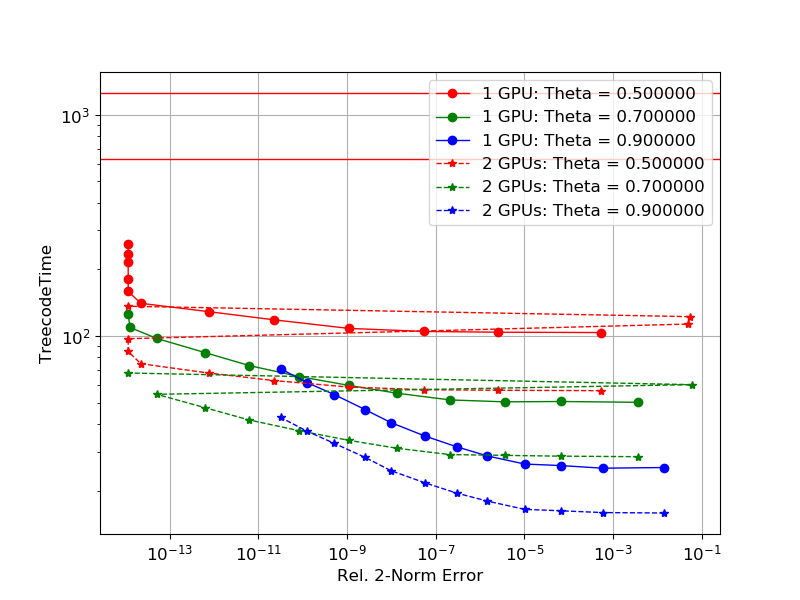

<IPython.core.display.Javascript object>


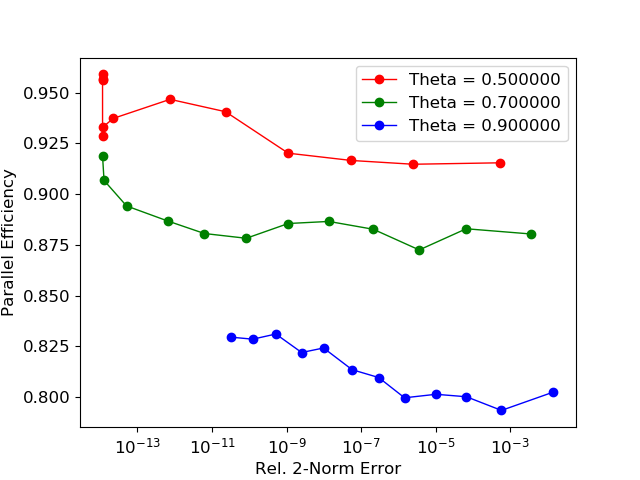

In [150]:
## Hermite GPU Parallelization Results

saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/06-06-2019/random/'


df2 = df.sort_values(by=['Order'])
# df2 = df2 = df2.loc[df['Rel. 2-Norm Error']<0.03]
# numDeviceComparison(df2,'TreecodeTime','Rel. 2-Norm Error','Theta',hlines={63,125}, save=saveDir+'K20_1M_timing')
# numDeviceComparison(df2,'TreecodeTime','Rel. 2-Norm Error','Theta',hlines={6337,12674}, save=saveDir+'K20_10M_timing')
numDeviceComparison(df2,'TreecodeTime','Rel. 2-Norm Error','Theta',hlines={627.638747,1252.688545}, save=saveDir+'TitanV_10M_timing')
# numDeviceComparison(df2,'TreecodeTime','Rel. 2-Norm Error','Theta', save=saveDir+'TitanV_1M_timing')
# directSumTitanParallel(save=saveDir+'directSumTitan')



<IPython.core.display.Javascript object>


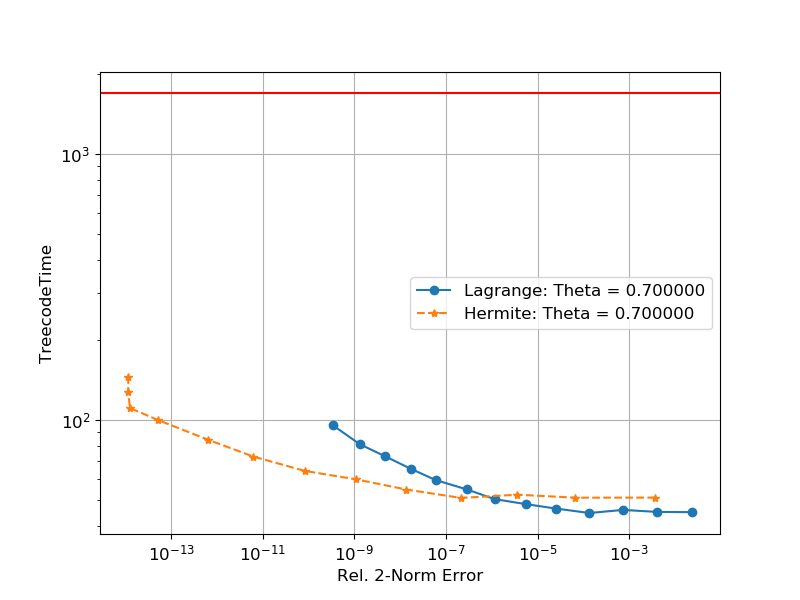

<IPython.core.display.Javascript object>


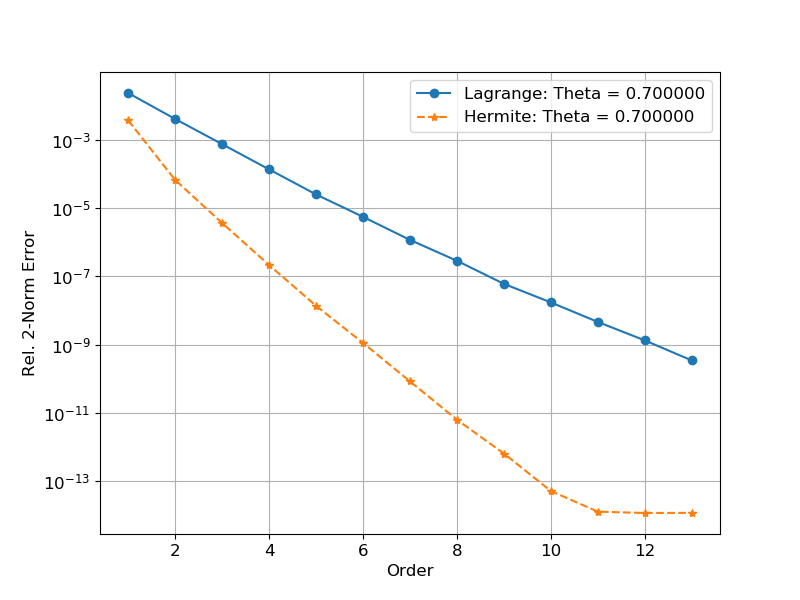

In [95]:
## Hermite-vs-Lagrange Random Particle Calculation

saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/06-06-2019/random/'
df2 = df.sort_values(by=['Order'])
df2 = df2.loc[df['Theta']==0.7]

# logAversusLogBcolorbyC(df2,'TreecodeTime','RelativeError','Order',save=saveDir+'10mil_PotentialError_order7')
# logAversusLogBcolorbyC(df2,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'10mil_2Norm_order7')
# logAversusLogBcolorbyC(df2,'TreecodeTime','inferr','Order',save=saveDir+'10mil_InfError_order7')

logAversusLogBcolorbyC(df2,'TreecodeTime','Rel. 2-Norm Error','Theta',hline=1698, save=saveDir+'10M_timing_theta0.7')
# logAversusLogBcolorbyC(df2,'inferr','Order','Theta',save=saveDir+'100k_PvsT_order8_inferr')
# logAversusLogBcolorbyC(df2,'Rel. 2-Norm Error','Order','Theta')
logAversusBcolorbyC(df2,'Rel. 2-Norm Error','Order','Theta',save=saveDir+'10M_scaling_theta0.7')
# logAversusBcolorbyC(df2,'inferr','Order','Theta')



[[54.538106 54.70698   0.       ... 54.959622 54.910213 61.17214 ]
 [54.717266 54.728573  0.       ... 54.954366 54.993749 61.230108]
 [ 0.        0.       54.787693 ...  0.        0.        0.      ]
 ...
 [36.711663 36.765986  0.       ... 38.175241 38.168968  0.      ]
 [36.964648 37.054717  0.       ... 39.126178 39.118615  0.      ]
 [37.485451 37.45451   0.       ... 44.04676  44.03316   0.      ]]


<IPython.core.display.Javascript object>


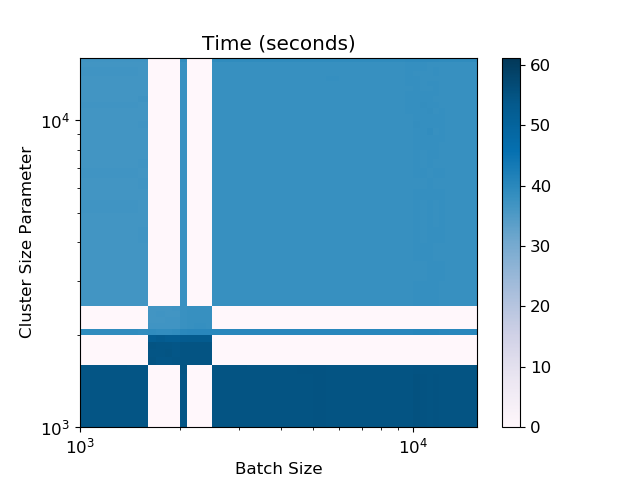

<IPython.core.display.Javascript object>


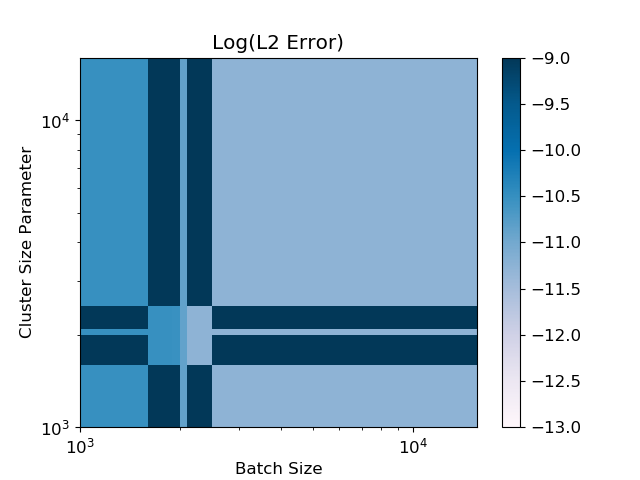

In [27]:
## Hermite Batch-Size Study Random Particle Calculation

saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/06-06-2019/random/'
df2 = df.sort_values(by=['MaxParNode'])
df2 = df2.loc[df2['Theta'] == 0.7]
df2 = df2.loc[df2['Order'] == 7]


NodeSizeVsBatchSize(df2, save=saveDir+'titan_1M_heatmap_order7')
# logAversusLogBcolorbyC(df2,'TreecodeTime','Rel. 2-Norm Error','BatchSize',hline=11.7, save=saveDir+'1M_batchSize')
# logAversusLogBcolorbyC(df2,'TreecodeTime','MaxParNode','BatchSize',hline=11.7, save=saveDir+'1M_MaxParNode')


In [246]:
## Hartree Potential Calculation

# # saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/05-30-2019/random/'
# saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/05-30-2019/Hartree/'
# # df = df.loc[df['Theta']<0.85]
# # df = df.loc[df['BatchSize']==10000]
# df.sort_values(by=['Theta'], inplace=True)
# logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','Order',save=saveDir+'2.3mil_totalPotential')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'2.3mil_2Norm')
# logAversusLogBcolorbyC(df,'TreecodeTime','inferr','Order',save=saveDir+'2.3mil_InfErr')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'10mil_2Norm')
# logAversusLogBcolorbyC(df,'TreecodeTime','Theta','Order')
# logAversusLogBcolorbyC(df,'inferr','Theta','Order')
# logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','BatchSize')


<IPython.core.display.Javascript object>


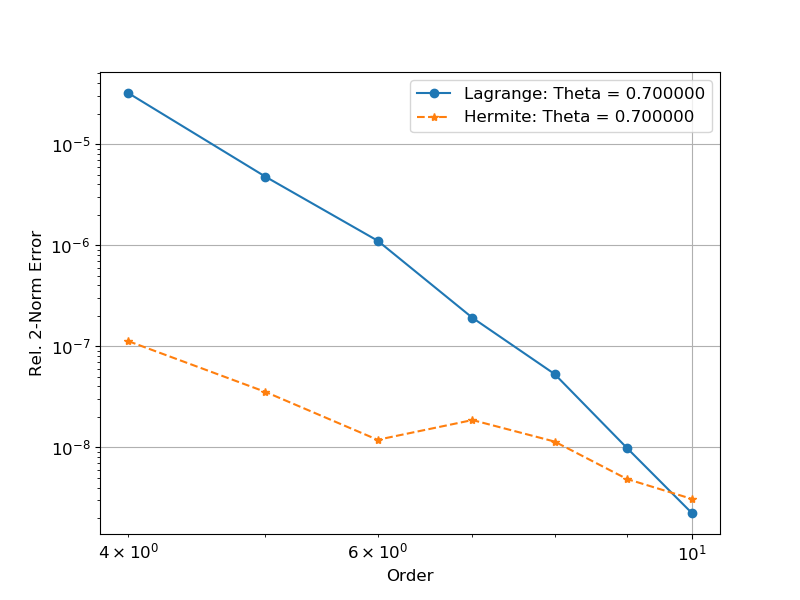

In [420]:
## Random Particle Calculation

saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/05-30-2019/random/'
df = df.loc[df['BatchSize']==10000]
df = df.loc[df['Theta']==0.7]
df = df.sort_values(by=['Order'])
# logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','Order',save=saveDir+'10mil_PotentialError_order7')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'10mil_2Norm_order7')
# logAversusLogBcolorbyC(df,'TreecodeTime','inferr','Order',save=saveDir+'10mil_InfError_order7')

# logAversusLogBcolorbyC(df,'TreecodeTime','Theta','Order',save=saveDir+'10mil_PvsT_order8_time')
# logAversusLogBcolorbyC(df,'inferr','Theta','Order',save=saveDir+'10mil_PvsT_order8_inferr')
# logAversusLogBcolorbyC(df,'Rel. 2-Norm Error','Theta','Order',save=saveDir+'10mil_PvsT_order8_L2err')

# logAversusLogBcolorbyC(df,'TreecodeTime','Order','Theta',save=saveDir+'10mil_PvsT_theta0.7_time')
# logAversusLogBcolorbyC(df,'inferr','Order','Theta',save=saveDir+'10mil_PvsT_theta0.7_inferr')
logAversusLogBcolorbyC(df,'Rel. 2-Norm Error','Order','Theta',save=saveDir+'10mil_PvsT_theta0.7_L2err')

# logAversusLogBcolorbyC(df,'TreecodeTime','Order','Theta',save=saveDir+'10mil_PvsT_theta0.5_time')
# logAversusLogBcolorbyC(df,'inferr','Order','Theta',save=saveDir+'10mil_PvsT_theta0.5_inferr')
# logAversusLogBcolorbyC(df,'Rel. 2-Norm Error','Order','Theta',save=saveDir+'10mil_PvsT_theta0.5_L2err')

# df = df.sort_values(by=['Theta'])
# # logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','Order')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order')
